<h3>What are the public’s main concerns regarding the balance between online safety and freedom of expression under the Online Safety Act?
</h3>

<h4>What is your main concern about how the online safety act could affect freedom of expression online?
</h4>

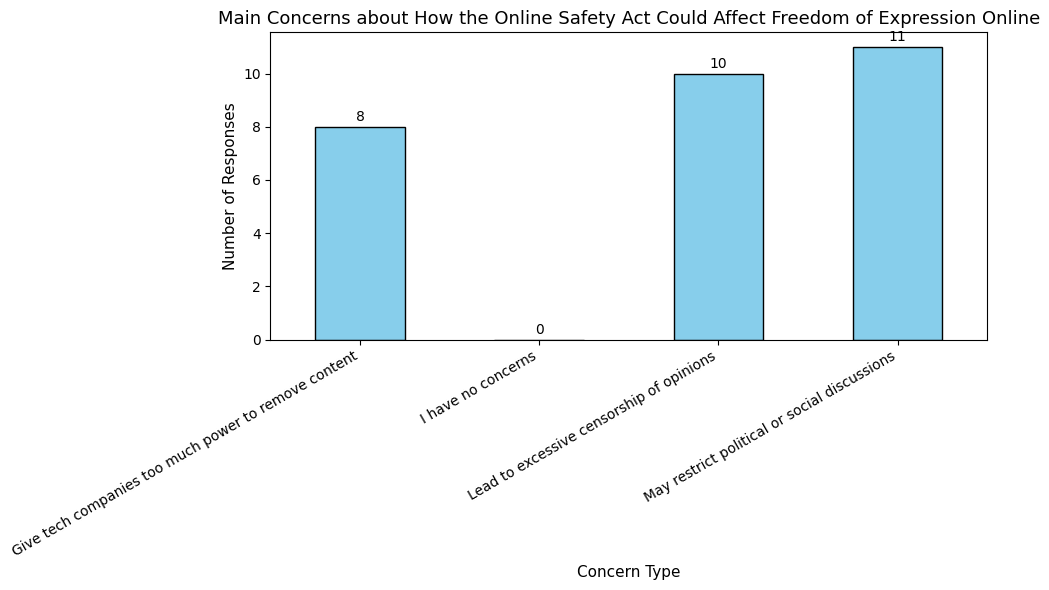

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("data.csv")

column_name = "What is your main concern about how the online safety act could affect freedom of expression online?"

concerns = df[column_name].fillna("I have no concerns")

concerns_split = concerns.str.split(", ").explode().value_counts()

if "I have no concerns" not in concerns_split.index:
    concerns_split["I have no concerns"] = 0


concerns_split = concerns_split.sort_index()


plt.figure(figsize=(10,6))
bars = concerns_split.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title("Main Concerns about How the Online Safety Act Could Affect Freedom of Expression Online", fontsize=13)
plt.xlabel("Concern Type", fontsize=11)
plt.ylabel("Number of Responses", fontsize=11)
plt.xticks(rotation=30, ha='right')

for i, value in enumerate(concerns_split):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



Does the Online Safety Act protect users from harm without unfairly limiting freedom of expressions?

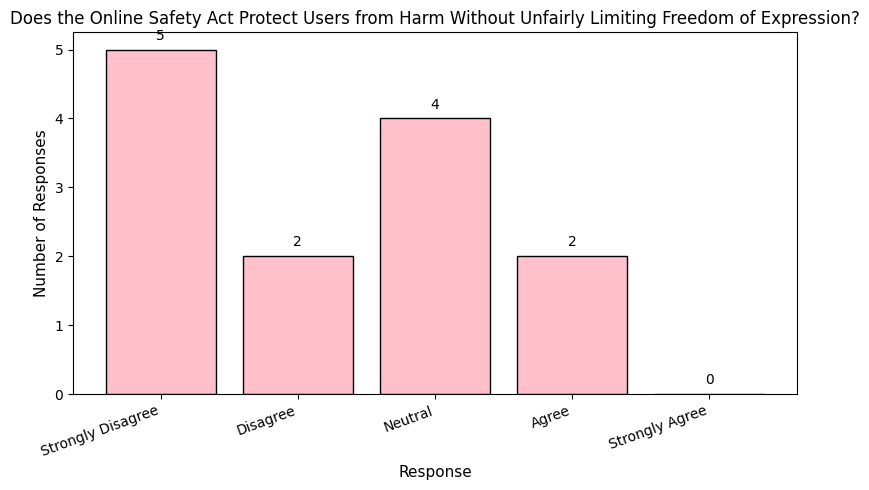

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

column = "Does the Online Safety Act protect users from harm without unfairly limiting freedom of expressions?"

responses = df[column].value_counts().sort_index()

for i in range(1, 6):
    if i not in responses.index:
        responses[i] = 0

responses = responses.sort_index()

labels = {
    1: "Strongly Disagree",
    2: "Disagree",
    3: "Neutral",
    4: "Agree",
    5: "Strongly Agree"
}

plt.figure(figsize=(8,5))
bars = plt.bar(responses.index, responses.values, color="pink", edgecolor="black")

plt.title("Does the Online Safety Act Protect Users from Harm Without Unfairly Limiting Freedom of Expression?", fontsize=12)
plt.xlabel("Response", fontsize=11)
plt.ylabel("Number of Responses", fontsize=11)
plt.xticks(list(labels.keys()), list(labels.values()), rotation=20, ha="right")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             int(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


What should be prioritized more under the online safety act?

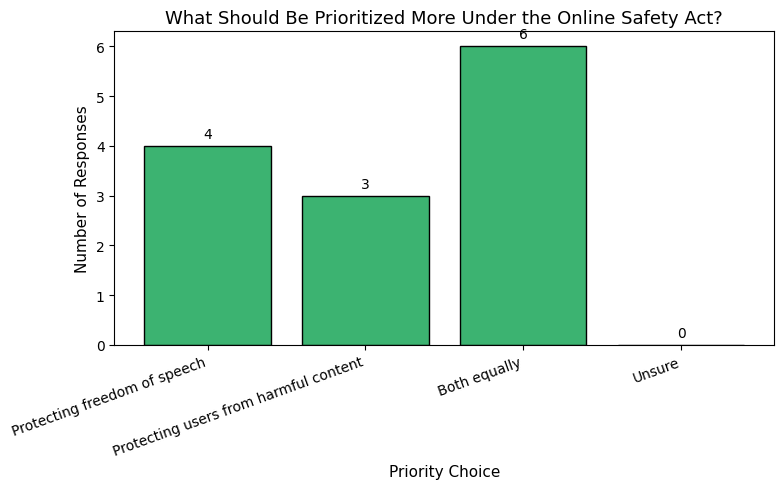

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

column = "What should be prioritized more under the online safety act?"

priorities = df[column].value_counts()

expected_options = [
    "Protecting freedom of speech",
    "Protecting users from harmful content",
    "Both equally",
    "Unsure"
]

for option in expected_options:
    if option not in priorities.index:
        priorities[option] = 0

priorities = priorities.reindex(expected_options)


plt.figure(figsize=(8,5))
bars = plt.bar(priorities.index, priorities.values, color="mediumseagreen", edgecolor="black")


plt.title("What Should Be Prioritized More Under the Online Safety Act?", fontsize=13)
plt.xlabel("Priority Choice", fontsize=11)
plt.ylabel("Number of Responses", fontsize=11)
plt.xticks(rotation=20, ha='right')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             int(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
